In [ ]:
import pandas as pd


from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

#plot
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score,classification_report


file_path = '/content/Breast_cancer_data.csv'


data = pd.read_csv(file_path)


data.head(100)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0
1,20.570,17.77,132.90,1326.0,0.08474,0
2,19.690,21.25,130.00,1203.0,0.10960,0
3,11.420,20.38,77.58,386.1,0.14250,0
4,20.290,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
95,20.260,23.03,132.40,1264.0,0.09078,0
96,12.180,17.84,77.79,451.1,0.10450,1
97,9.787,19.94,62.11,294.5,0.10240,1
98,11.600,12.84,74.34,412.6,0.08983,1


In [ ]:
data.shape

(569, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [ ]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [ ]:
data.describe().round(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.00,569.00,569.00,569.00,569.00,569.00
mean,14.13,19.29,91.97,654.89,0.10,0.63
std,3.52,4.30,24.30,351.91,0.01,0.48
min,6.98,9.71,43.79,143.50,0.05,0.00
25%,11.70,16.17,75.17,420.30,0.09,0.00
50%,13.37,18.84,86.24,551.10,0.10,1.00
75%,15.78,21.80,104.10,782.70,0.11,1.00
max,28.11,39.28,188.50,2501.00,0.16,1.00


In [ ]:
data.isna().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


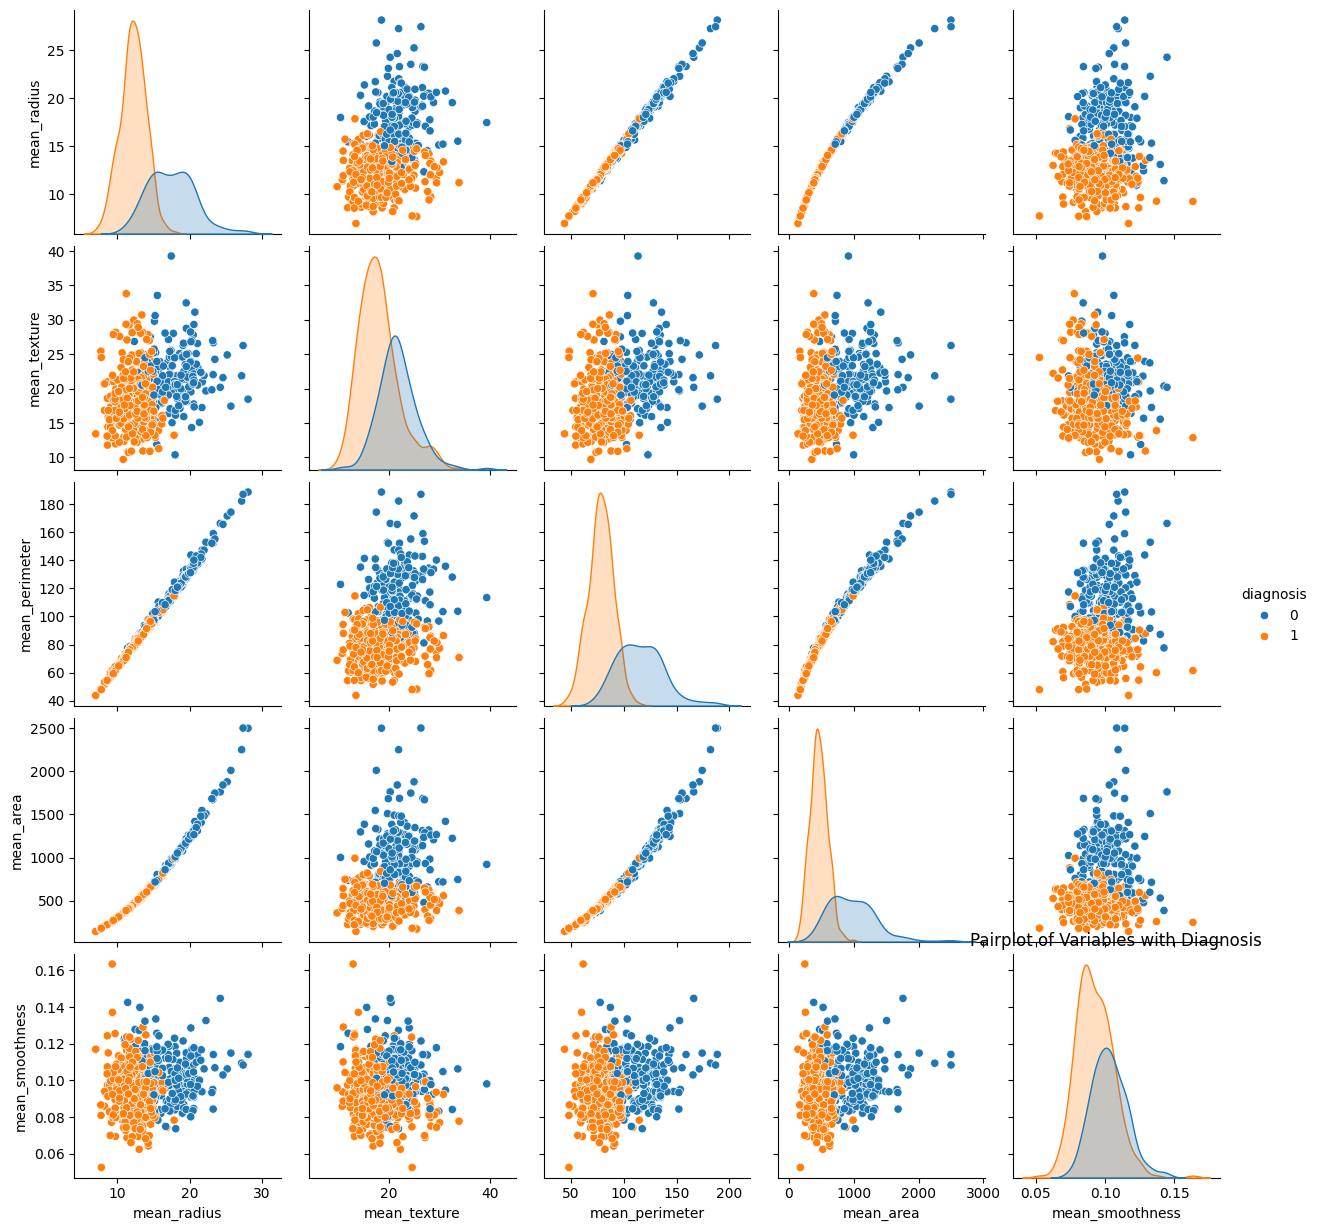

In [ ]:
# Pairplot for visualization of relationships between variables
sns.pairplot(data, hue='diagnosis', vars=['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'])
plt.title('Pairplot of Variables with Diagnosis')
plt.show()

diagnosis
1    357
0    212
Name: count, dtype: int64


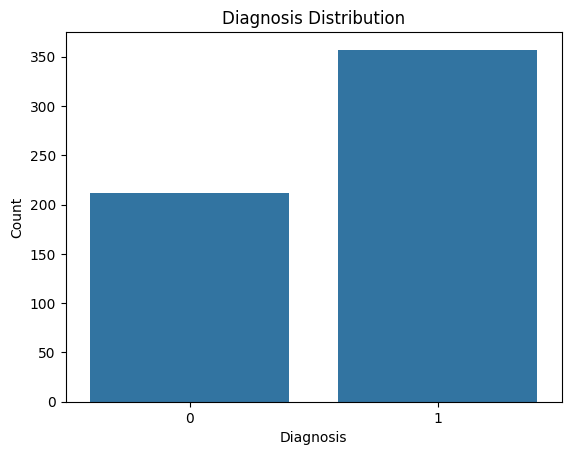

In [ ]:
print(data['diagnosis'].value_counts())
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

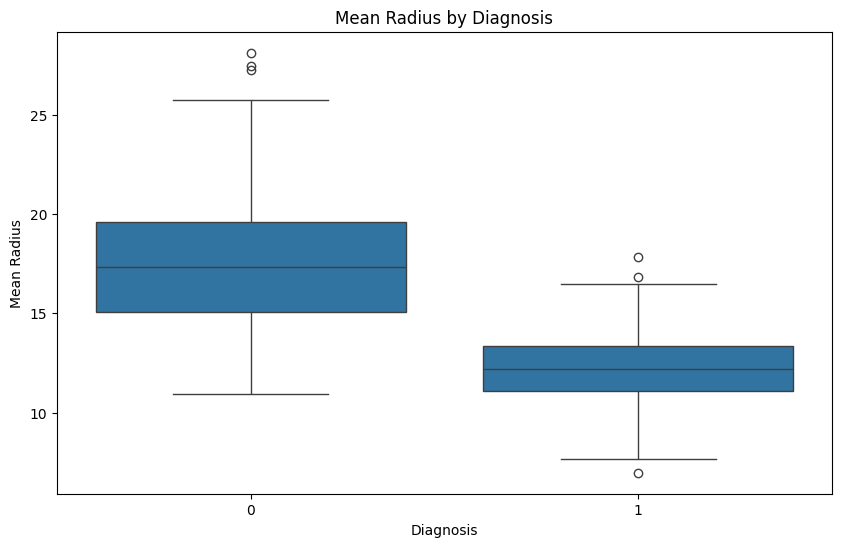

In [ ]:
#Boxplot for comparing variables by diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='mean_radius', data=data)
plt.title('Mean Radius by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.show()

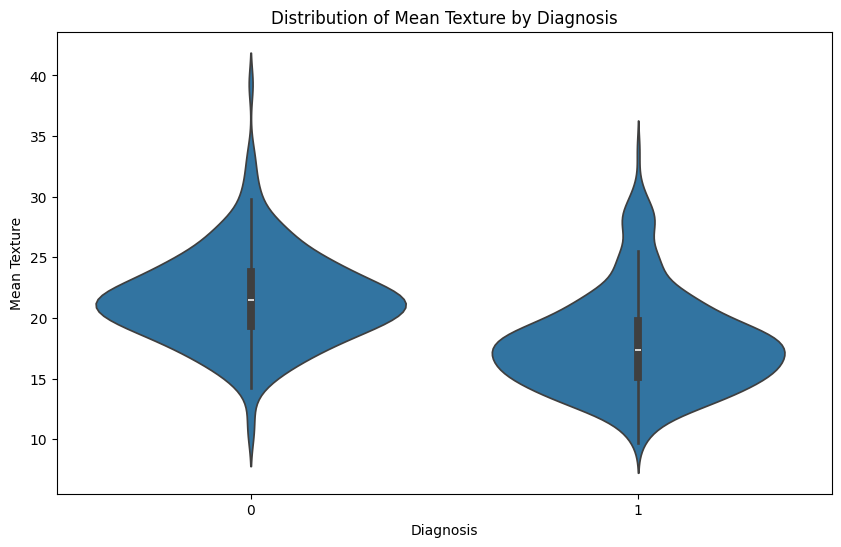

In [ ]:
# Violin plot to compare the distribution of mean texture by diagnosis
plt.figure(figsize=(10, 6))
sns.violinplot(x='diagnosis', y='mean_texture', data=data)
plt.title('Distribution of Mean Texture by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Texture')
plt.show()

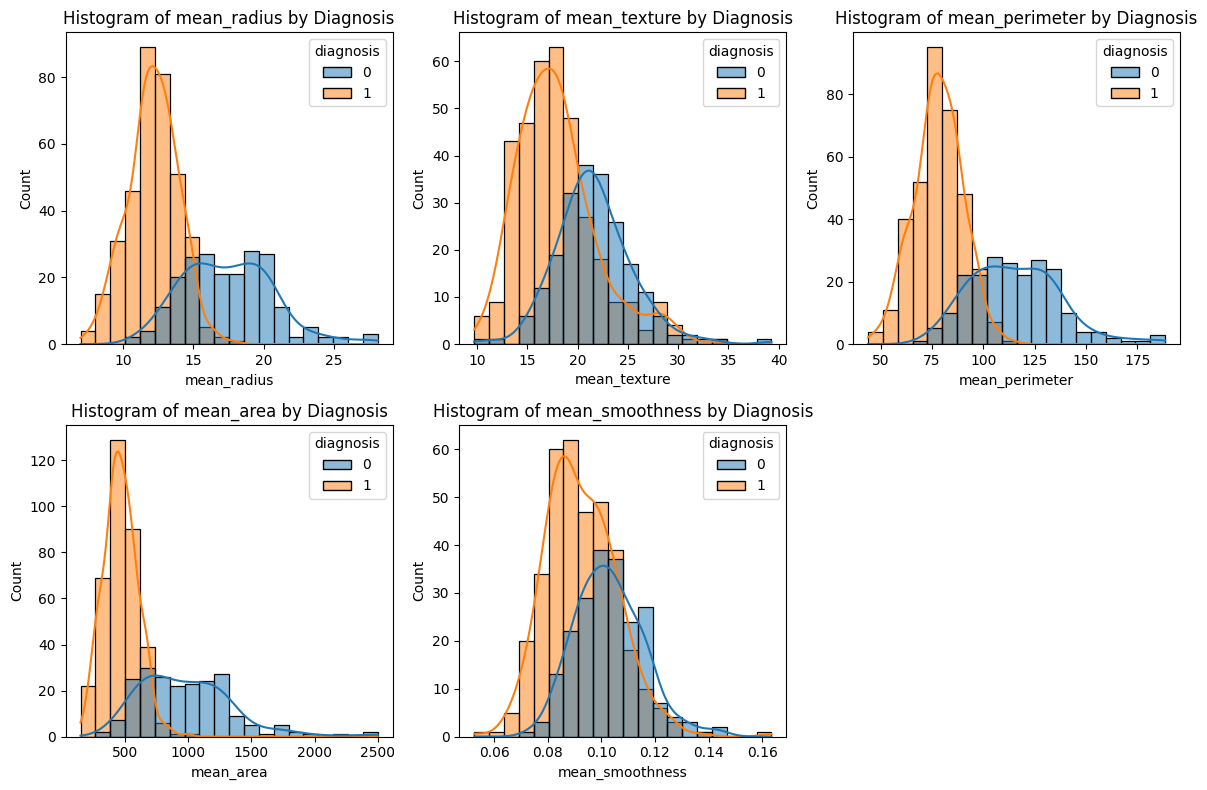

In [ ]:
# Histograms for each feature, colored by diagnosis
plt.figure(figsize=(12, 8))
for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data, x=feature, hue='diagnosis', kde=True, bins=20, alpha=0.5)
    plt.title(f'Histogram of {feature} by Diagnosis')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
data.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


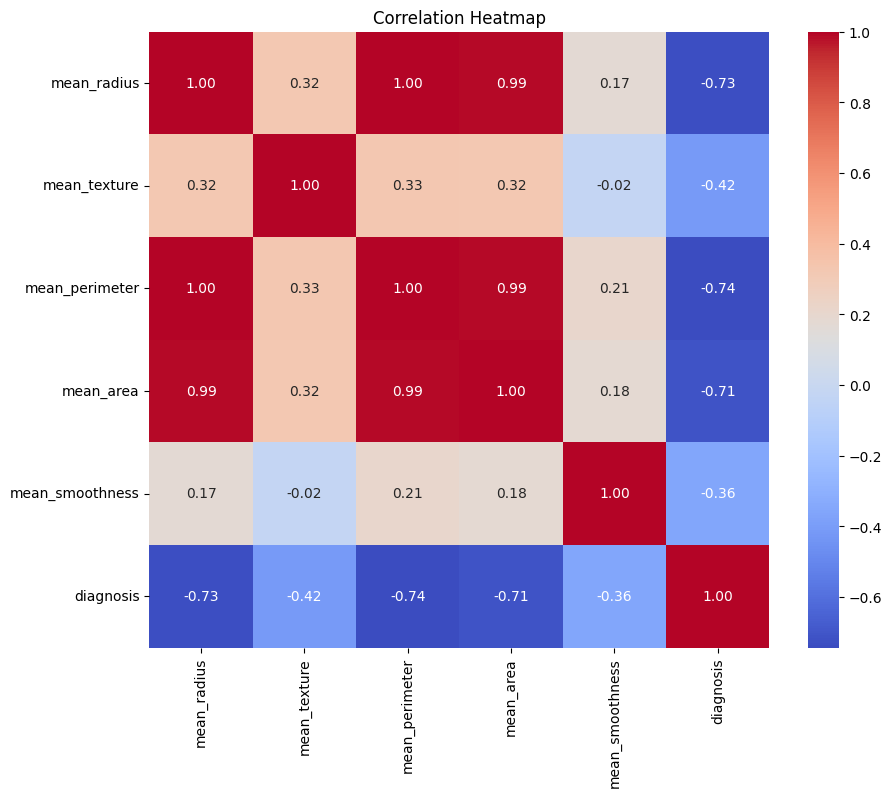

In [ ]:
#Correlation heatmap to visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-22-b16718021d33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='diagnosis', y='mean_perimeter', data=data, palette='Set2')


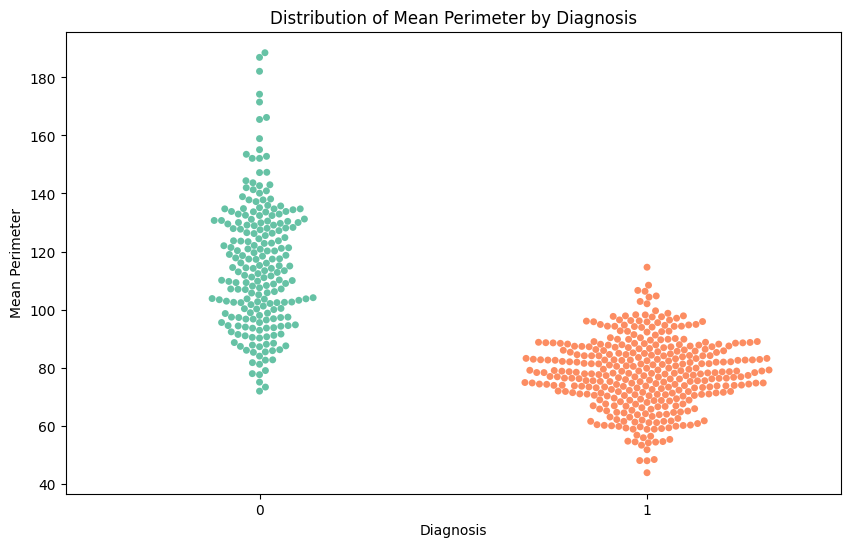

In [ ]:
# Swarm plot to visualize the distribution of mean perimeter by diagnosis
plt.figure(figsize=(10, 6))
sns.swarmplot(x='diagnosis', y='mean_perimeter', data=data, palette='Set2')
plt.title('Distribution of Mean Perimeter by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Perimeter')
plt.show()

In [ ]:
# Splitting the dataset into features (X) and target variable (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [ ]:
print(f"Shape of X: {X.shape}")

Shape of X: (569, 5)


In [ ]:
print(f"Shape of y: {y.shape}")

Shape of y: (569,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
print("Training set shape:", X_train.shape, y_train.shape)

Training set shape: (455, 5) (455,)


In [ ]:
print("Testing set shape:", X_test.shape, y_test.shape)

Testing set shape: (114, 5) (114,)


In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
# Cross-validation to evaluate each model
for name , model in models.items():
    scores=cross_val_score(model , X_train , y_train , cv=5)
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} (±{scores.std():.4f})")

Random Forest Cross-Validation Accuracy: 0.9121 (±0.0220)
SVM Cross-Validation Accuracy: 0.9275 (±0.0323)
K-Nearest Neighbors Cross-Validation Accuracy: 0.9077 (±0.0204)


In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.37719298245614036
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        43
           1       0.00      0.00      0.00        71

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

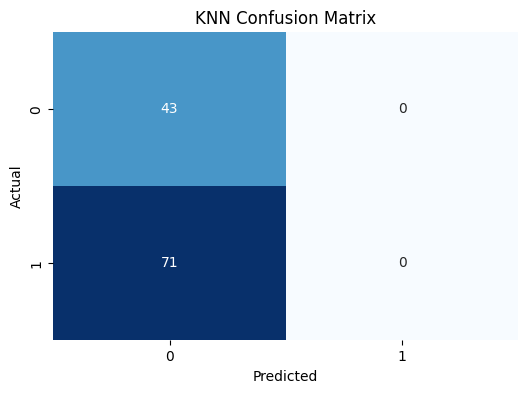

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, "KNN Confusion Matrix")

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.37719298245614036
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        43
           1       0.00      0.00      0.00        71

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `z

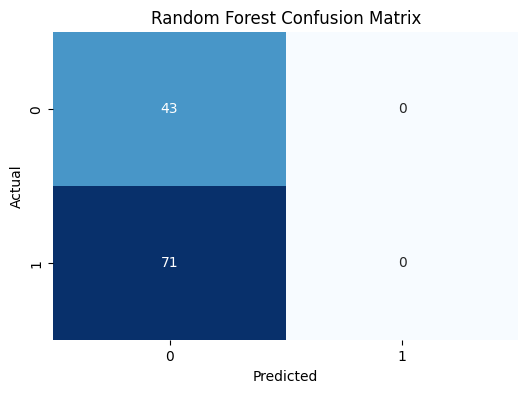

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest Confusion Matrix")

In [ ]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.37719298245614036
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        43
           1       0.00      0.00      0.00        71

    accuracy                           0.38       114
   macro avg       0.19      0.50      0.27       114
weighted avg       0.14      0.38      0.21       114



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

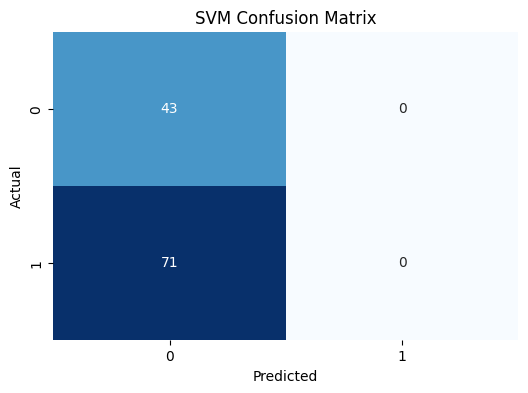

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, "SVM Confusion Matrix")

In [ ]:
# Function to print actual vs predicted values
def print_actual_vs_predicted(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    for actual, predicted in zip(y_test, y_pred):
        print(f"Actual: {actual}, Predicted: {predicted}")

In [ ]:
print_actual_vs_predicted(y_test, y_pred_knn, "KNN")

--- KNN ---
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actu

In [ ]:
print_actual_vs_predicted(y_test, y_pred_rf, "Random Forest")

--- Random Forest ---
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predict

In [ ]:
print_actual_vs_predicted(y_test, y_pred_svm, "SVM")

--- SVM ---
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 1, Predicted: 0
Actu